## Gamma Correction

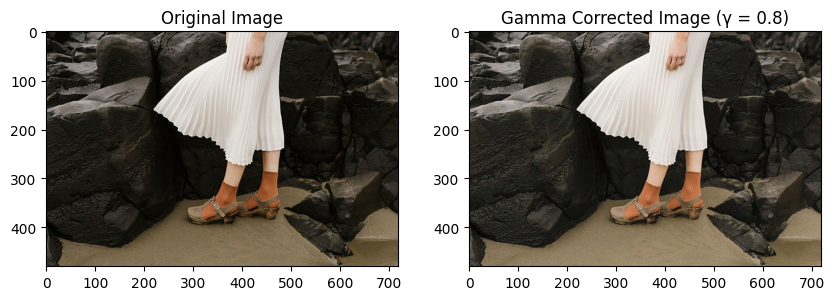

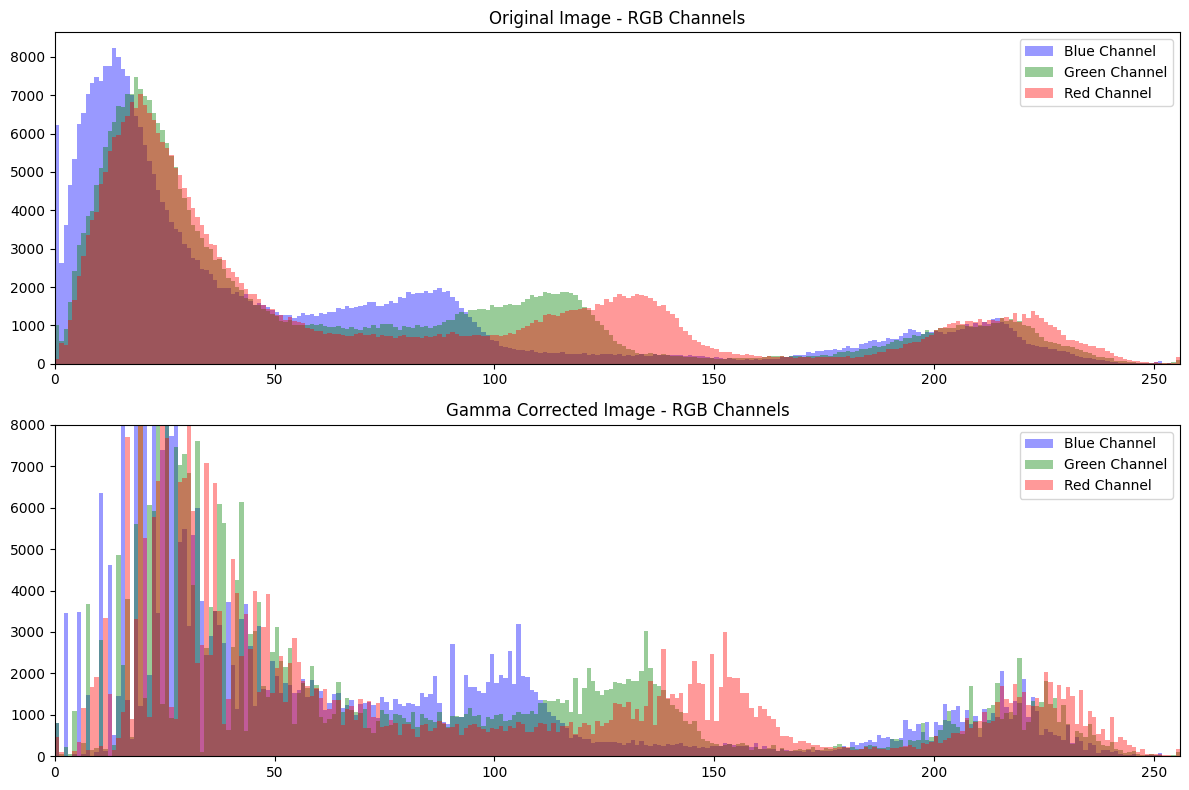

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = r'C:\Users\Asus\Documents\GitHub\EN3160-Image-Processing-and-Machine-Vision-Lab-Experiments\assignment_1\a1images\highlights_and_shadows.jpg'
img = cv.imread(img_path)

# Convert the image to the L*a*b* color space
lab_img = cv.cvtColor(img, cv.COLOR_BGR2LAB)

# Split into L*, a*, b* channels
L_channel, a_channel, b_channel = cv.split(lab_img)

# Normalize L* channel
L_channel = L_channel / 255.0

# Apply gamma correction to the L* channel
gamma_value = 0.8  # Set gamma value to 0.8
L_corrected = np.array(255 * (L_channel ** gamma_value), dtype='uint8')

# Merge the corrected L* channel back with the original a* and b* channels
lab_corrected_img = cv.merge((L_corrected, a_channel, b_channel))

# Convert back to BGR color space for display
img_corrected = cv.cvtColor(lab_corrected_img, cv.COLOR_LAB2BGR)

# Plot original and gamma-corrected images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_corrected, cv.COLOR_BGR2RGB))
plt.title('Gamma Corrected Image (γ = 0.8)')
plt.show()

# Create subplots for the original and gamma-corrected histograms
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Original image histograms (Red, Green, Blue in the same plot)
axs[0].set_title('Original Image - RGB Channels')
axs[0].hist(img[:, :, 0].flatten(), bins=256, range=[0, 256], color='b', alpha=0.4, label="Blue Channel")
axs[0].hist(img[:, :, 1].flatten(), bins=256, range=[0, 256], color='g', alpha=0.4, label="Green Channel")
axs[0].hist(img[:, :, 2].flatten(), bins=256, range=[0, 256], color='r', alpha=0.4, label="Red Channel")
axs[0].set_xlim([0, 256])
axs[0].legend()

# Gamma corrected image histograms (Red, Green, Blue in the same plot)
axs[1].set_title('Gamma Corrected Image - RGB Channels')
axs[1].hist(img_corrected[:, :, 0].flatten(), bins=256, range=[0, 256], color='b', alpha=0.4, label="Blue Channel")
axs[1].hist(img_corrected[:, :, 1].flatten(), bins=256, range=[0, 256], color='g', alpha=0.4, label="Green Channel")
axs[1].hist(img_corrected[:, :, 2].flatten(), bins=256, range=[0, 256], color='r', alpha=0.4, label="Red Channel")
axs[1].set_xlim([0, 256])
axs[1].set_ylim([0, 8000])  # Set y-axis limit to reduce dominance of zeros
axs[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


## Display all in one

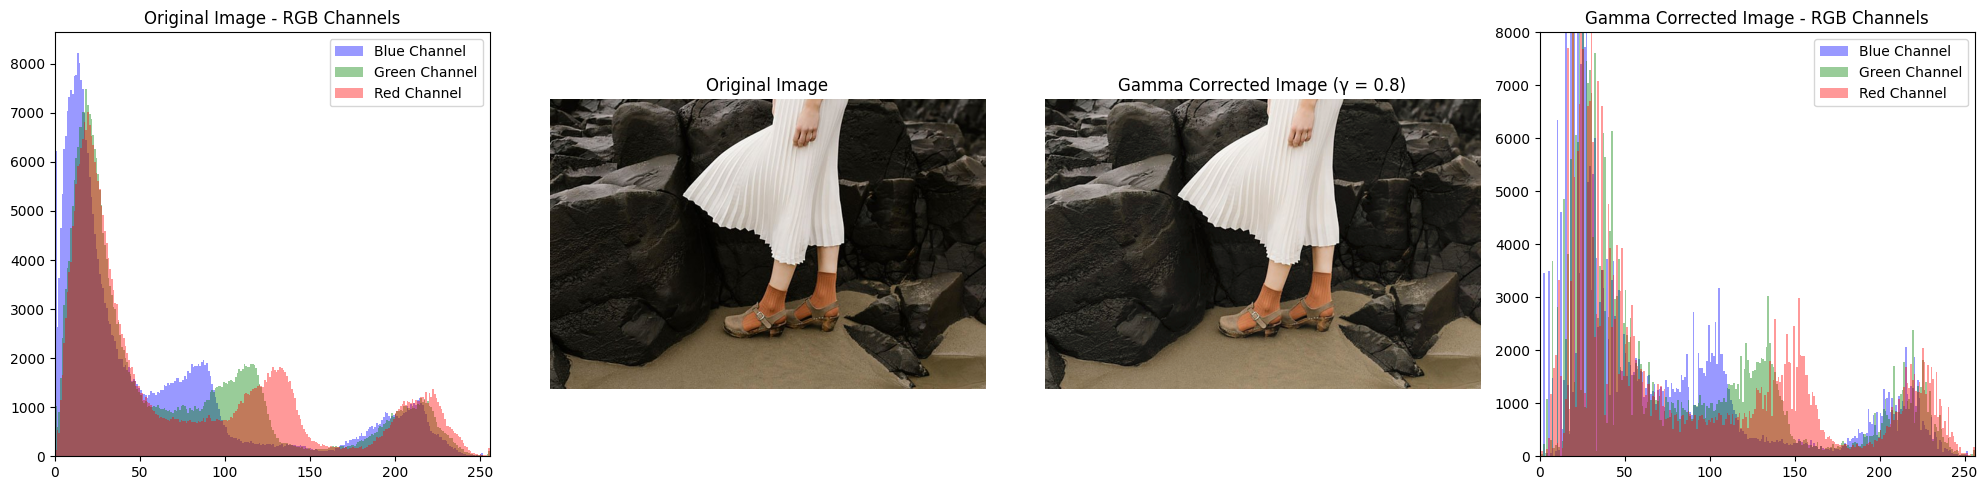

In [3]:
# display original image - RGB channels, Original image, Gamma corrected image, Gamma Corrected Image - RGB Channels in one row
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Original image - RGB channels
axs[0].set_title('Original Image - RGB Channels')
axs[0].hist(img[:, :, 0].flatten(), bins=256, range=[0, 256], color='b', alpha=0.4, label="Blue Channel")
axs[0].hist(img[:, :, 1].flatten(), bins=256, range=[0, 256], color='g', alpha=0.4, label="Green Channel")
axs[0].hist(img[:, :, 2].flatten(), bins=256, range=[0, 256], color='r', alpha=0.4, label="Red Channel")
axs[0].set_xlim([0, 256])
axs[0].legend()

# Original image
axs[1].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[1].set_title('Original Image')
axs[1].axis('off')

# Gamma corrected image
axs[2].imshow(cv.cvtColor(img_corrected, cv.COLOR_BGR2RGB))
axs[2].set_title('Gamma Corrected Image (γ = 0.8)')
axs[2].axis('off')

# Gamma Corrected Image - RGB Channels
axs[3].set_title('Gamma Corrected Image - RGB Channels')
axs[3].hist(img_corrected[:, :, 0].flatten(), bins=256, range=[0, 256], color='b', alpha=0.4, label="Blue Channel")
axs[3].hist(img_corrected[:, :, 1].flatten(), bins=256, range=[0, 256], color='g', alpha=0.4, label="Green Channel")
axs[3].hist(img_corrected[:, :, 2].flatten(), bins=256, range=[0, 256], color='r', alpha=0.4, label="Red Channel")
axs[3].set_xlim([0, 256])
axs[3].set_ylim([0, 8000])  # Set y-axis limit to reduce dominance of zeros
axs[3].legend()

# Show the plots
plt.tight_layout()
plt.show()